In [1]:
print("hii")

hii


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import pickle
import os

In [52]:
df = pd.read_csv("c.csv")

In [53]:
print(df)

   state_name District_name  Season   Temperature         PH    Rainfall  \
0          AP        guntur  kharif  1.556612e+01   6.734788   57.098765   
1          AP        guntur    rabi  2.576843e+01   7.345670   57.923756   
2          AP        guntur    rabi  3.492876e+06   8.234567   56.938400   
3          AP        guntur    rabi  2.345600e+01   5.345670   98.765400   
4          AP        guntur   karif  6.447600e+02   8.345670  657.926500   
5          AP        guntur    rabi  1.698634e+01  98.873400    6.345670   
6          AP        guntur    rabi  2.487354e+01   9.655432    9.345670   
7          AP        guntur    rabi  1.482750e+01   8.563700    7.345678   
8          AP        guntur    rabi  3.468790e+01   8.522222    4.984600   
9          AP        guntur   karif  7.804280e+01   4.542555    9.786950   
10         AP        guntur    rabi  7.909845e+01   4.986987    8.987645   
11         AP        guntur   karif  8.902875e+01   9.456600    9.094387   
12         A

In [54]:
df.head()

,state_name,District_name,Season,Temperature,PH,Rainfall,phosphorous,nitrogen,potash,crop
0,AP,guntur,kharif,1.556612e+01,6.734788,57.098765,4.865733,8.128947,8.213834,wheat
1,AP,guntur,rabi,2.576843e+01,7.345670,57.923756,8.938217,8.921846,8.872360,cotton
2,AP,guntur,rabi,3.492876e+06,8.234567,56.938400,7.918265,9.873400,9.983267,urad
3,AP,guntur,rabi,2.345600e+01,5.345670,98.765400,9.875368,3.887326,0.000000,mirchi
4,AP,guntur,karif,6.447600e+02,8.345670,657.926500,8.889365,8.932865,8.327468,wheat


In [55]:
df.size

260

In [56]:
df.shape

(26, 10)

In [57]:
df.columns

Index(['state_name', 'District_name', 'Season', 'Temperature', 'PH',
       'Rainfall', 'phosphorous', 'nitrogen', 'potash', 'crop'],
      dtype='object')

In [58]:
df['crop'].unique()

array(['wheat', 'cotton', 'urad', 'mirchi', 'gram', 'maize', 'paddy'],
      dtype=object)

In [59]:
df.dtypes

state_name        object
District_name     object
Season            object
Temperature      float64
PH               float64
Rainfall         float64
phosphorous      float64
nitrogen         float64
potash           float64
crop              object
dtype: object

In [60]:
df['crop'].value_counts()

mirchi    6
maize     5
paddy     5
wheat     4
cotton    4
urad      1
gram      1
Name: crop, dtype: int64

<AxesSubplot:>

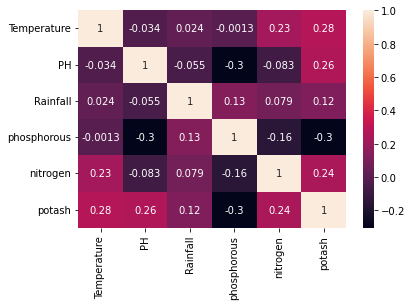

In [61]:
sns.heatmap(df.corr(),annot=True)

In [62]:
features = df[['Temperature','PH','Rainfall','phosphorous','nitrogen','potash']]



In [63]:
target = df['crop']

In [64]:
acc = []

In [65]:
model = []

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
acc_score = []

In [70]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

In [71]:
for i in n_estimators:
    RF = RandomForestClassifier(n_estimators=i, random_state=2)
    RF.fit(Xtrain,Ytrain)
    predicted_values = RF.predict(Xtest)

    x = metrics.accuracy_score(Ytest, predicted_values)
    acc_score.append(x) 
    

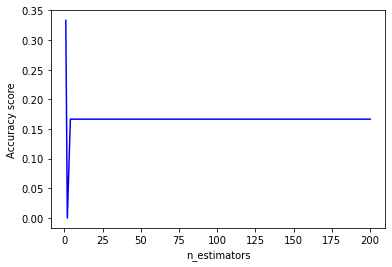

In [72]:
plt.plot(n_estimators, acc_score, 'b', label='Accuracy')
plt.ylabel('Accuracy score')
plt.xlabel('n_estimators')
plt.show()    


In [73]:
acc_score

[0.3333333333333333,
 0.0,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666]

In [74]:
RF = RandomForestClassifier(n_estimators=16, random_state=2)
RF.fit(Xtrain,Ytrain)

RandomForestClassifier(n_estimators=16, random_state=2)

In [75]:
predicted_values = RF.predict(Xtest)


In [76]:
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('RF')                   #model name
print("RF's Accuracy is: ", x)

RF's Accuracy is:  0.16666666666666666


In [77]:
print(classification_report(Ytest,predicted_values))

              precision    recall  f1-score   support

      cotton       0.00      0.00      0.00         1
       maize       0.00      0.00      0.00         0
      mirchi       0.20      1.00      0.33         1
       paddy       0.00      0.00      0.00         2
       wheat       0.00      0.00      0.00         2

    accuracy                           0.17         6
   macro avg       0.04      0.20      0.07         6
weighted avg       0.03      0.17      0.06         6



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classif

In [78]:
plt.figure(figsize=[10,1],dpi = 100)

<Figure size 1000x100 with 0 Axes>

<Figure size 1000x100 with 0 Axes>

<AxesSubplot:xlabel='Accuracy', ylabel='Algorithm'>

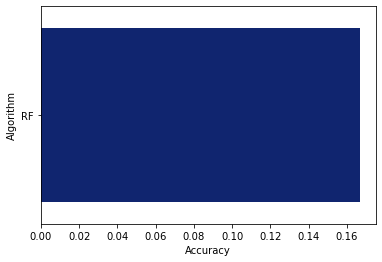

In [79]:
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [80]:
score = cross_val_score(RF,features,target,cv=3)


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


In [81]:
score

array([0.11111111, 0.33333333, 0.375     ])

In [82]:
accuracy_models = dict(zip(model, acc))

In [83]:
for k, v in accuracy_models.items():
    print (k, '-->', v)

RF --> 0.16666666666666666


In [84]:
data = np.array([[25,6,30,53,23,12,]])
prediction = RF.predict(data)
print(prediction)

['cotton']


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
